In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from Mandelbrot_h import whenLeaveMandelbrotSet as wlms, orthogonalSampling_h as OS_h
from MonteCarloIntegration import orthogonalSampling as OS
from QuasiMonteCarlo import quasiMC
import scipy.stats.qmc as qmc
from CircleSampling import RS_circle, LHS_circle, OS_circle

#### Circle sampling

Constant s, varying i

In [2]:
# Compare the convergence rate of the two orthogonal methods with constant s
max_i = 500  # Max iterations
iterations = np.arange(10, max_i, 5)
s = 10000  # s is constant
n = 100  # Number of runs

# 1 for in square, 2 for in circle
areas1 = np.zeros((len(iterations), n))
areas2 = np.zeros((len(iterations), n))
for i, iter in enumerate(iterations):
    for j in range(n):
        areas1[i, j] = OS(-2, 2, iter, s)
        areas2[i, j] = OS_circle(iter, s, R=2)[-1]


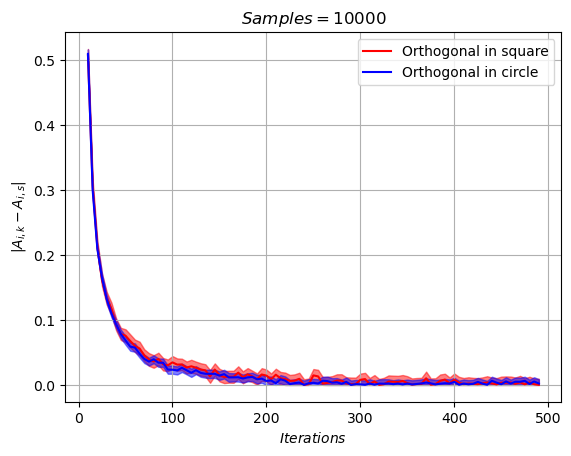

In [3]:
# Get the confidence intervals
A_mean1 = np.mean(areas1, axis=1)
A_mean2 = np.mean(areas2, axis=1)
A_std1 = np.std(areas1, axis=1, ddof=1)
A_std2 = np.std(areas2, axis=1, ddof=1)
dA1 = abs(A_mean1[:-1] - A_mean1[-1])
dA2 = abs(A_mean2[:-1] - A_mean2[-1])
dA_conf1 = (A_std1[:-1] ** 2 + A_std1[-1] ** 2)**0.5 * 1.96 / n**0.5
dA_conf2 = (A_std2[:-1] ** 2 + A_std2[-1] ** 2)**0.5 * 1.96 / n**0.5
left1 = dA1 - dA_conf1
left2 = dA2 - dA_conf2
right1 = dA1 + dA_conf1
right2 = dA2 + dA_conf2
left1[left1 < 0] = 0
left2[left2 < 0] = 0

# Plot
plt.plot(iterations[:-1], dA1, label="Orthogonal in square", color='red')
plt.plot(iterations[:-1], dA2, label="Orthogonal in circle", color='blue')
plt.fill_between(iterations[:-1], left1, right1, color='red', alpha=0.5)
plt.fill_between(iterations[:-1], left2, right2, color='blue', alpha=0.5)

# Plot settings
plt.xlabel('$Iterations$')
plt.ylabel('$|A_{i,k} - A_{i,s}|$')
plt.title(f'$Samples = {s}$')
plt.grid()
plt.legend()

# Save figure
plt.savefig('results/Square_Circle_vary_iters.png', dpi=300)

In [4]:
a = 1 - 0.95

for i, iteration in enumerate(iterations):
    # Perform welch test to test means
    welch = stats.ttest_ind(areas1[i], areas1[-1], equal_var=False)

    # Get p value
    p = welch.pvalue

    # When means are not significant different
    if p > a:
        print(f'Convergence for orthogonal in square at {iteration} iterations, p = {p}')
        break

for i, iteration in enumerate(iterations):
    # Perform welch test to test means
    welch = stats.ttest_ind(areas2[i], areas2[-1], equal_var=False)

    # Get p value
    p = welch.pvalue

    # When means are not significant different
    if p > a:
        print(f'Convergence for orthogonal in circle at {iteration} iterations, p = {p}')
        break

Convergence for orthogonal in square at 220 iterations, p = 0.07523117833918772
Convergence for orthogonal in circle at 200 iterations, p = 0.05691195322899723


Constant i, varying s

In [2]:
# Compare the convergence rate of the two orthogonal methods with constant s
iter = 500  # iter is constant
samples = np.arange(6, 100, 2)**2
n = 100  # Number of runs

# 1 for in square, 2 for in circle
areas1 = np.zeros((len(samples), n))
areas2 = np.zeros((len(samples), n))
for i, s in enumerate(samples):
    for j in range(n):
        areas1[i, j] = OS(-2, 2, iter, s)
        areas2[i, j] = OS_circle(iter, s, R=2)[-1]


In [3]:
A_mean1 = np.mean(areas1, axis=1)
A_mean2 = np.mean(areas2, axis=1)
A_std1 = np.std(areas1, axis=1, ddof=1)
A_std2 = np.std(areas2, axis=1, ddof=1)
dA1 = abs(A_mean1[:-1] - A_mean1[-1])
dA2 = abs(A_mean2[:-1] - A_mean2[-1])
dA_conf1 = (A_std1[:-1] ** 2 + A_std1[-1] ** 2)**0.5 * 1.96 / n**0.5
dA_conf2 = (A_std2[:-1] ** 2 + A_std2[-1] ** 2)**0.5 * 1.96 / n**0.5

left1 = dA1 - dA_conf1
left2 = dA2 - dA_conf2
right1 = dA1 + dA_conf1
right2 = dA2 + dA_conf2
left1[left1 < 0] = 0
left2[left2 < 0] = 0

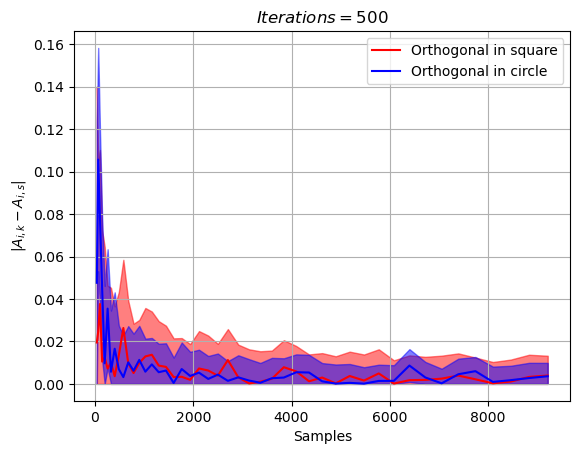

In [4]:
# Plot
plt.plot(samples[:-1], dA1, label="Orthogonal in square", color='red')
plt.plot(samples[:-1], dA2, label="Orthogonal in circle", color='blue')
plt.fill_between(samples[:-1], left1, right1, color='red', alpha=0.5)
plt.fill_between(samples[:-1], left2, right2, color='blue', alpha=0.5)

plt.xlabel('Samples')
plt.ylabel('$|A_{i,k} - A_{i,s}|$')
plt.title(f'$Iterations = {iter}$')
plt.grid()
plt.legend()

# Save figure
plt.savefig('results/Square_Circle_vary_samples.png', dpi=300)

In [5]:
a = 1 - 0.95

for i, sample in enumerate(samples):
    # Perform welch test to test means
    welch = stats.ttest_ind(areas1[i], areas1[-1], equal_var=False)

    # Get p value
    p = welch.pvalue

    # When means are not significant different
    if p > a:
        print(f'Convergence for orthogonal in square at {sample} samples, p = {p}')
        break

for i, sample in enumerate(samples):
    # Perform welch test to test means
    welch = stats.ttest_ind(areas2[i], areas2[-1], equal_var=False)

    # Get p value
    p = welch.pvalue

    # When means are not significant different
    if p > a:
        print(f'Convergence for orthogonal in circle at {sample} samples, p = {p}')
        break

Convergence for orthogonal in square at 36 samples, p = 0.7518464680373689
Convergence for orthogonal in circle at 36 samples, p = 0.22094101119958331
